In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("master.csv")

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
df.shape

(27820, 12)

In [6]:
df['country'].nunique()

101

In [7]:
df['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [8]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [9]:
#Change column names
df = df.rename(columns = {'suicides_no':'suicides', 'suicides/100k pop':'suicides/100k', 'gdp_for_year':'gdp/year','gdp_per_capita':'gdp/capita'})

In [10]:
df.head()

,country,year,sex,age,suicides,population,suicides/100k,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# visualizing the data by groups

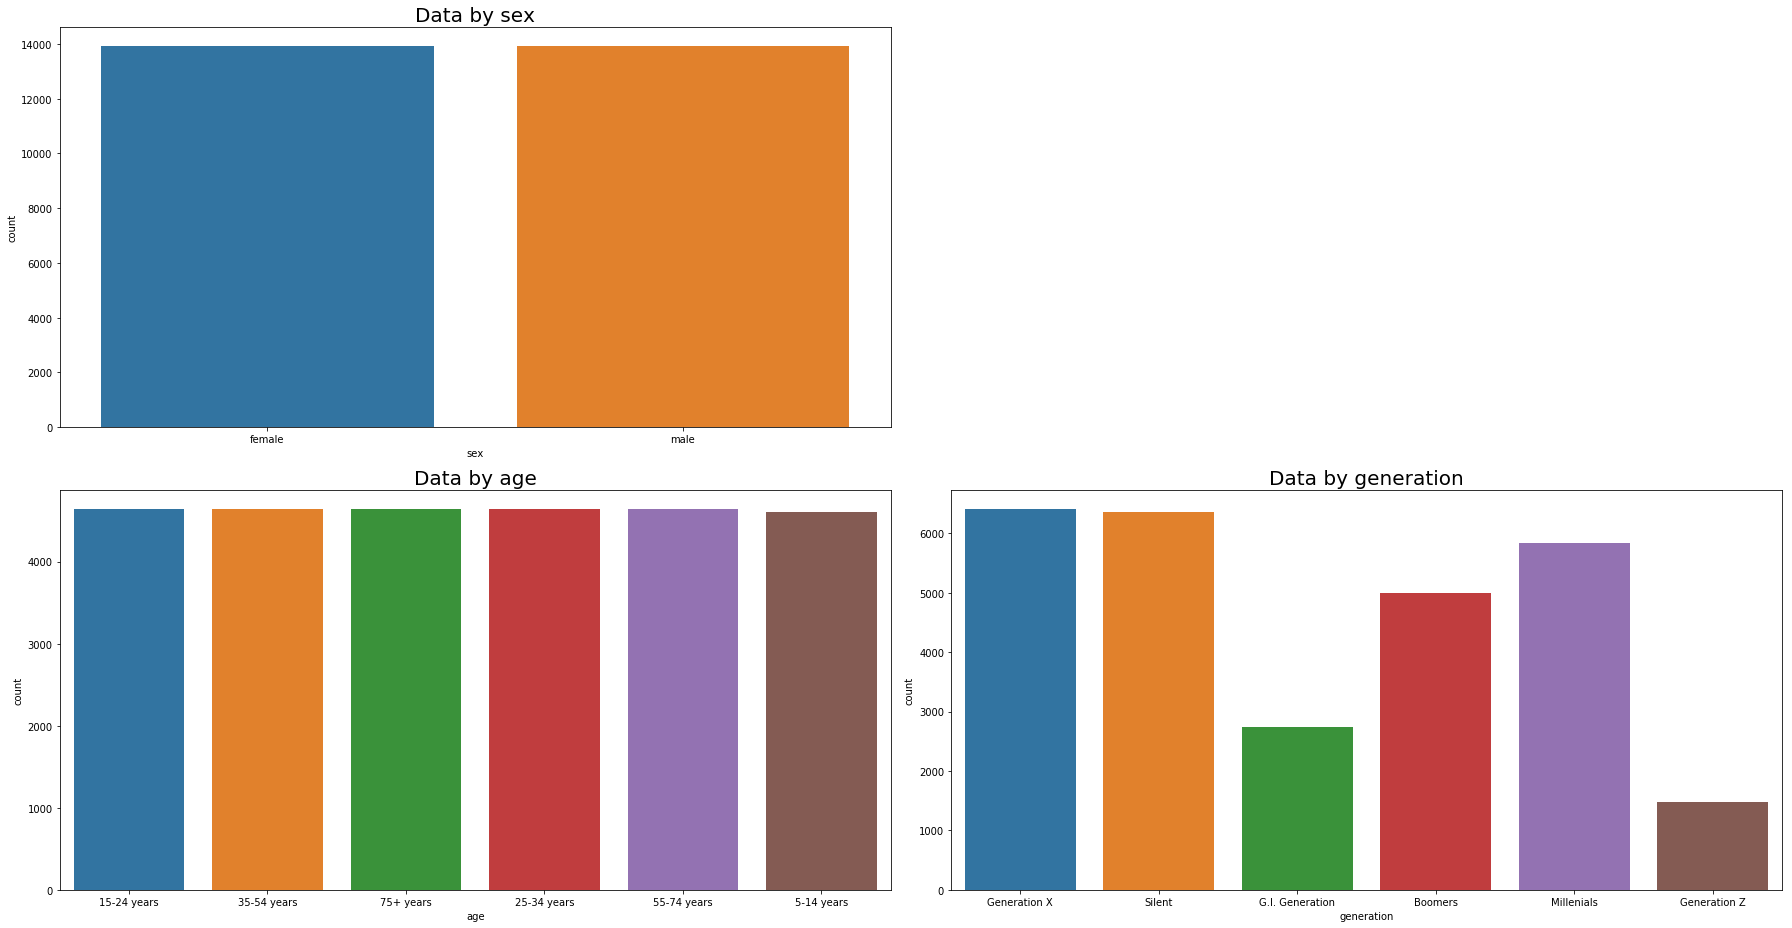

In [11]:
plt.figure(figsize=(25,13))
# By sex
plt.subplot(221)
sns.countplot(x='sex', data=df, alpha=1, order=['female','male'])
plt.title('Data by sex', fontsize=20)
# By age
plt.subplot(223)
sns.countplot(x='age', data=df, alpha=1)
plt.title('Data by age', fontsize=20)
# By generation
plt.subplot(224)
sns.countplot(x='generation', data=df, alpha=1)
plt.title('Data by generation', fontsize=20)

plt.tight_layout()
plt.show()



### Conclusion:
        
    The amount of data is same for by sex and by age, but the amount of data for by generation differs 

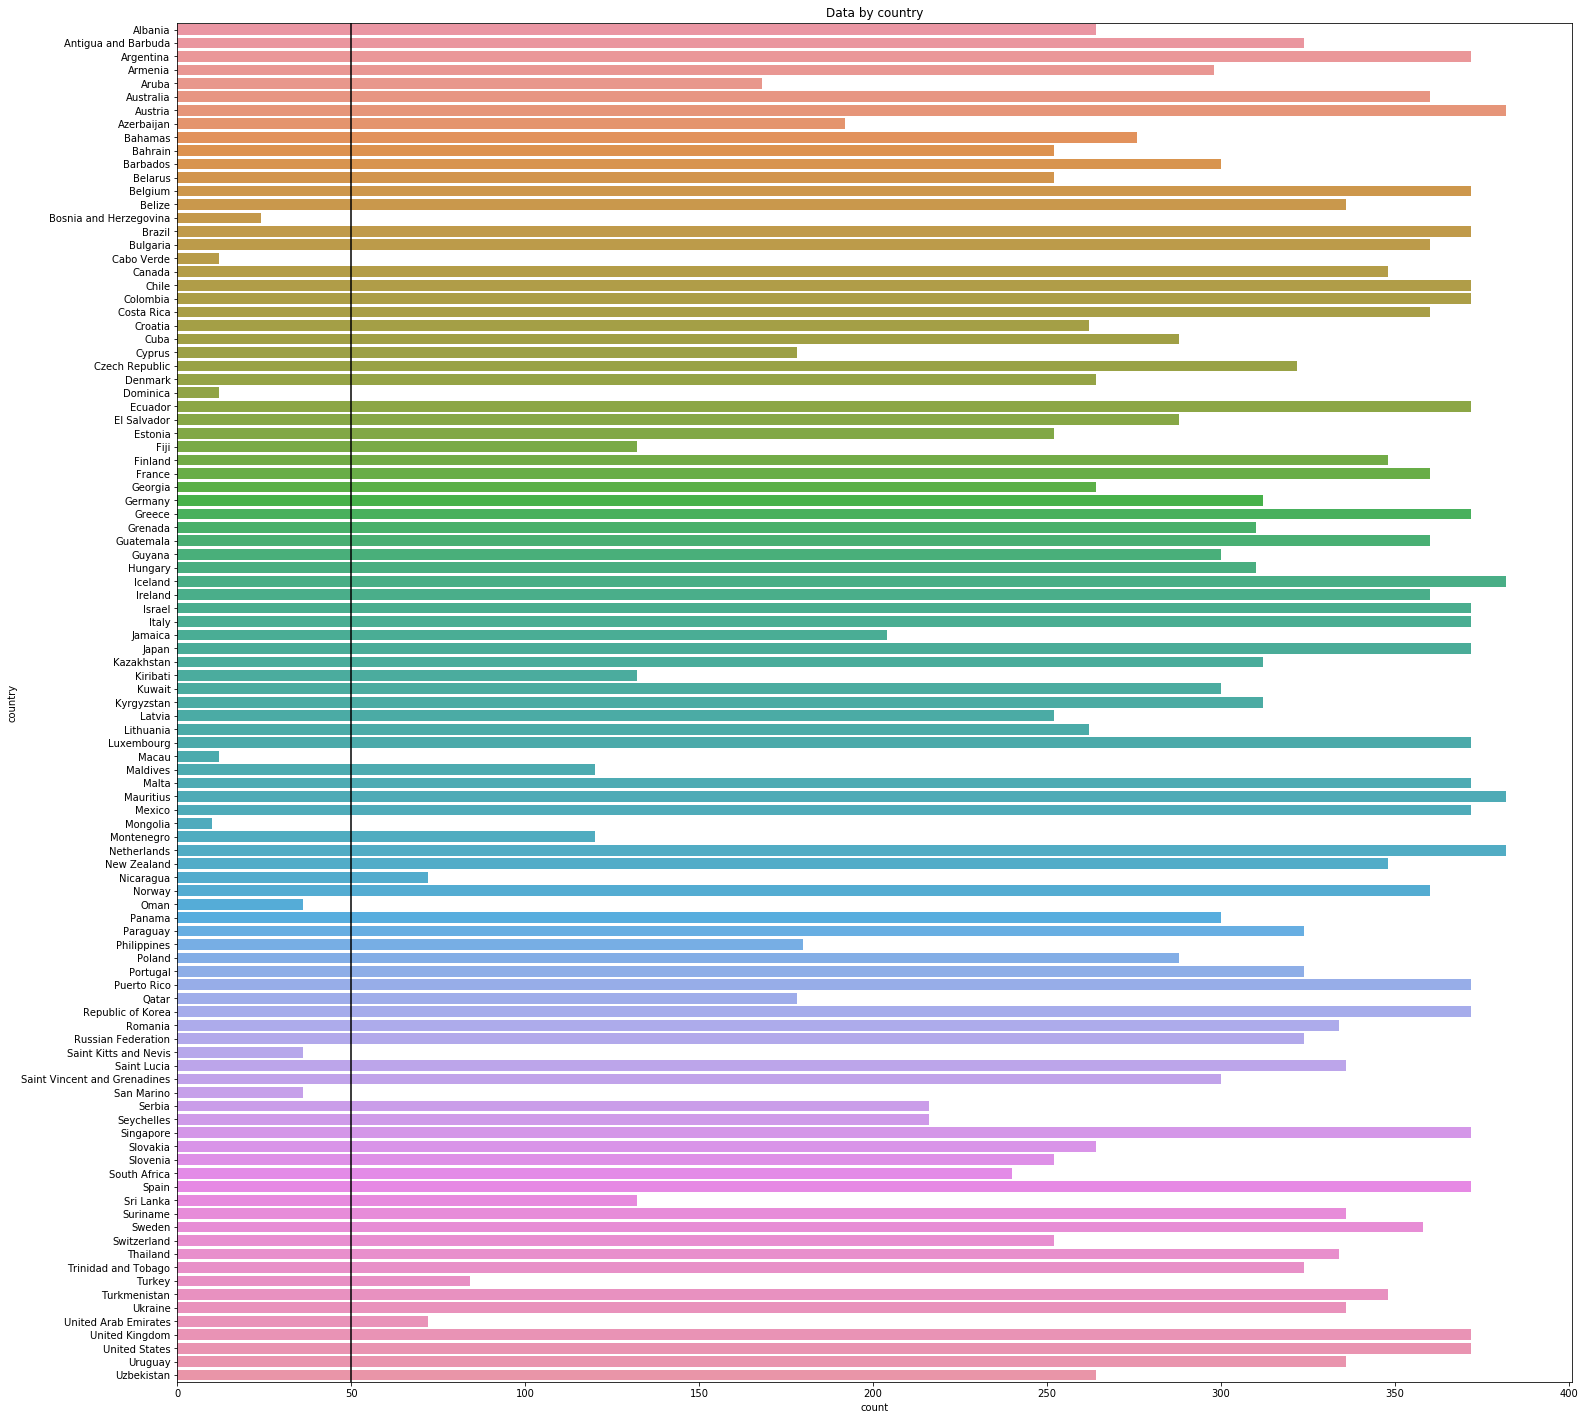

In [12]:
plt.figure(figsize = (25,25))
sns.countplot(y = 'country', data = df, alpha = 1)
plt.title('Data by country')
plt.axvline(x=50, color='k')
plt.show()

### Deleting the countries whose amount of data is below black line

In [13]:

country_data = df.groupby('country').count()['year'].reset_index()

country_data.sort_values(by = 'year', ascending = True).head(10)

,country,year
59,Mongolia,10
27,Dominica,12
54,Macau,12
17,Cabo Verde,12
14,Bosnia and Herzegovina,24
65,Oman,36
76,Saint Kitts and Nevis,36
79,San Marino,36
96,United Arab Emirates,72
63,Nicaragua,72


From the last dataset we figured out that the data of 8 countries have the amount of data 
less than 50 and they will be deleted.


In [14]:
country_selected_data = country_data[country_data['year'] > 50]['country'].reset_index()

In [15]:
df1 = pd.merge(df, country_selected_data, how = 'outer', indicator = True)
df1= df1[df1['_merge']== 'both']
df1.nunique()


country                  93
year                     32
sex                       2
age                       6
suicides               2084
population            25440
suicides/100k          5294
country-year           2306
HDI for year            305
 gdp_for_year ($)      2306
gdp_per_capita ($)     2219
generation                6
index                    93
_merge                    1
dtype: int64

### Visualizing the data by year and deleting the less year that has data below the black line 

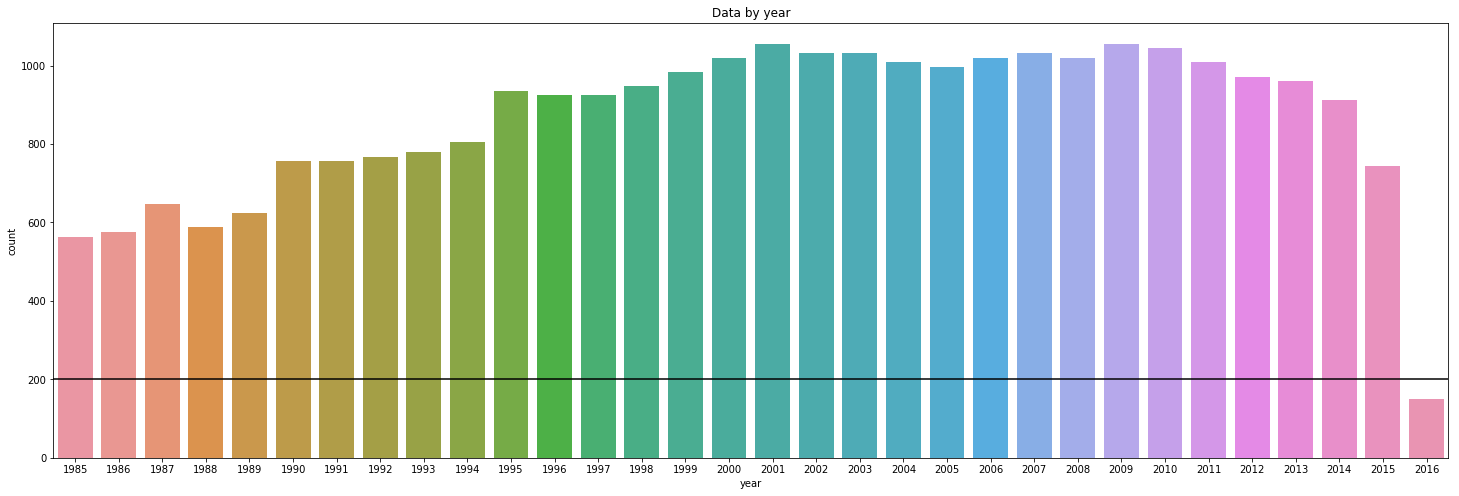

In [16]:
plt.figure(figsize=(25,8))
sns.countplot(x='year', data=df1, alpha=1)
plt.title('Data by year')
plt.axhline(y=200, color='k')
plt.show()

In [17]:
df2 = df1[df1['year'] != 2016]

### Counting the number of null values

In [18]:
len(df2)

27492

In [19]:
number_NAN = len(df2) - df2['HDI for year'].count()
number_noNan = len(df2)
number_NAN * 100 / number_noNan

69.75120034919249

Nearly 70% of data has the null values in the HDI for year so it can be dropped

### Since the null values are more drop the "HDI for year" column

In [20]:

df = df2.drop('HDI for year', axis = 1)
df.head()

,country,year,sex,age,suicides,population,suicides/100k,country-year,gdp_for_year ($),gdp_per_capita ($),generation,index,_merge
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X,0.0,both
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent,0.0,both
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X,0.0,both
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation,0.0,both
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers,0.0,both


### Suicides by country


I created a dataframe by country. The columns are the mean of each variable. The red line in the plot gives us the mean for over all countries.


In [21]:
byCountry = df.groupby('country').mean().sort_values('suicides/100k', ascending=False).reset_index()


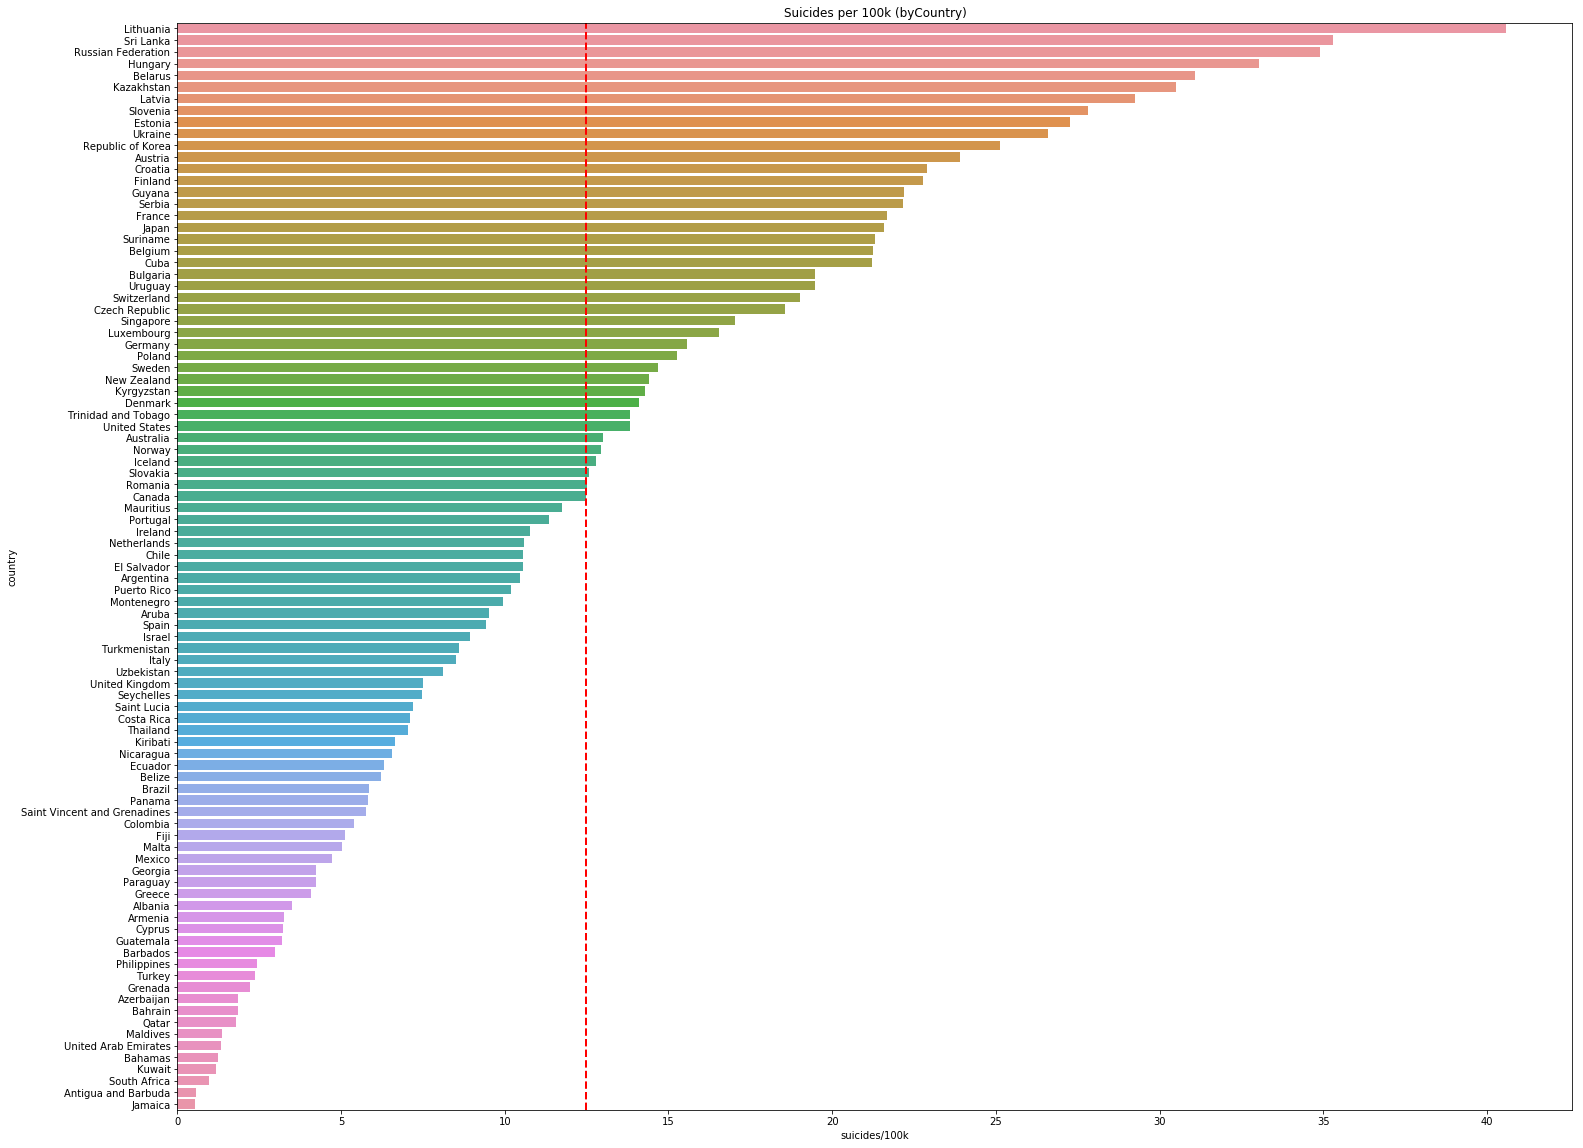

In [22]:
plt.figure(figsize = (25,20))
sns.barplot(x = 'suicides/100k', y = 'country', data = byCountry)
plt.axvline(x = byCountry['suicides/100k'].mean(),color = 'red', ls='--', linewidth=2)
plt.title('Suicides per 100k (byCountry)')
plt.show()


### Suicides By year

In [23]:

byYear = df.groupby('year').mean().reset_index()

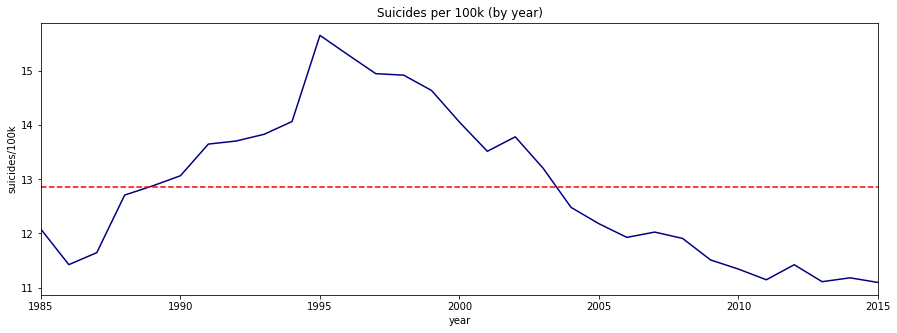

In [24]:
plt.figure(figsize=(15,5))
sns.lineplot(x='year', y='suicides/100k', data=byYear, color='navy')
plt.axhline(byYear['suicides/100k'].mean(), ls='--', color='red')
plt.title('Suicides per 100k (by year)')
plt.xlim(1985,2015)
plt.show()         

## Conclusions

1. Lithuania, Sri Lanka, and Russia are the top 3 countries with more suicides per 100k.
2. On the other hand, Jamaica, Antigua and Barbuda, and South Africa are the top 3 countries with less suicides per 100k.
3. The number of suicides per 100k has a decreasing trend after the peak in 1995.
4. From 2003 the number of suicides per 100k is below average.

### Suicides by sex

In [25]:
bySex = df.groupby('sex').mean().reset_index()

In [26]:
bySexYear = df.groupby(['sex','year']).mean().reset_index()
bySexAge = df.groupby(['sex','age']).mean().sort_values('suicides/100k',ascending = True).reset_index()
bySexGeneration = df.groupby(['sex','generation']).mean().sort_values('suicides/100k', ascending = True).reset_index()


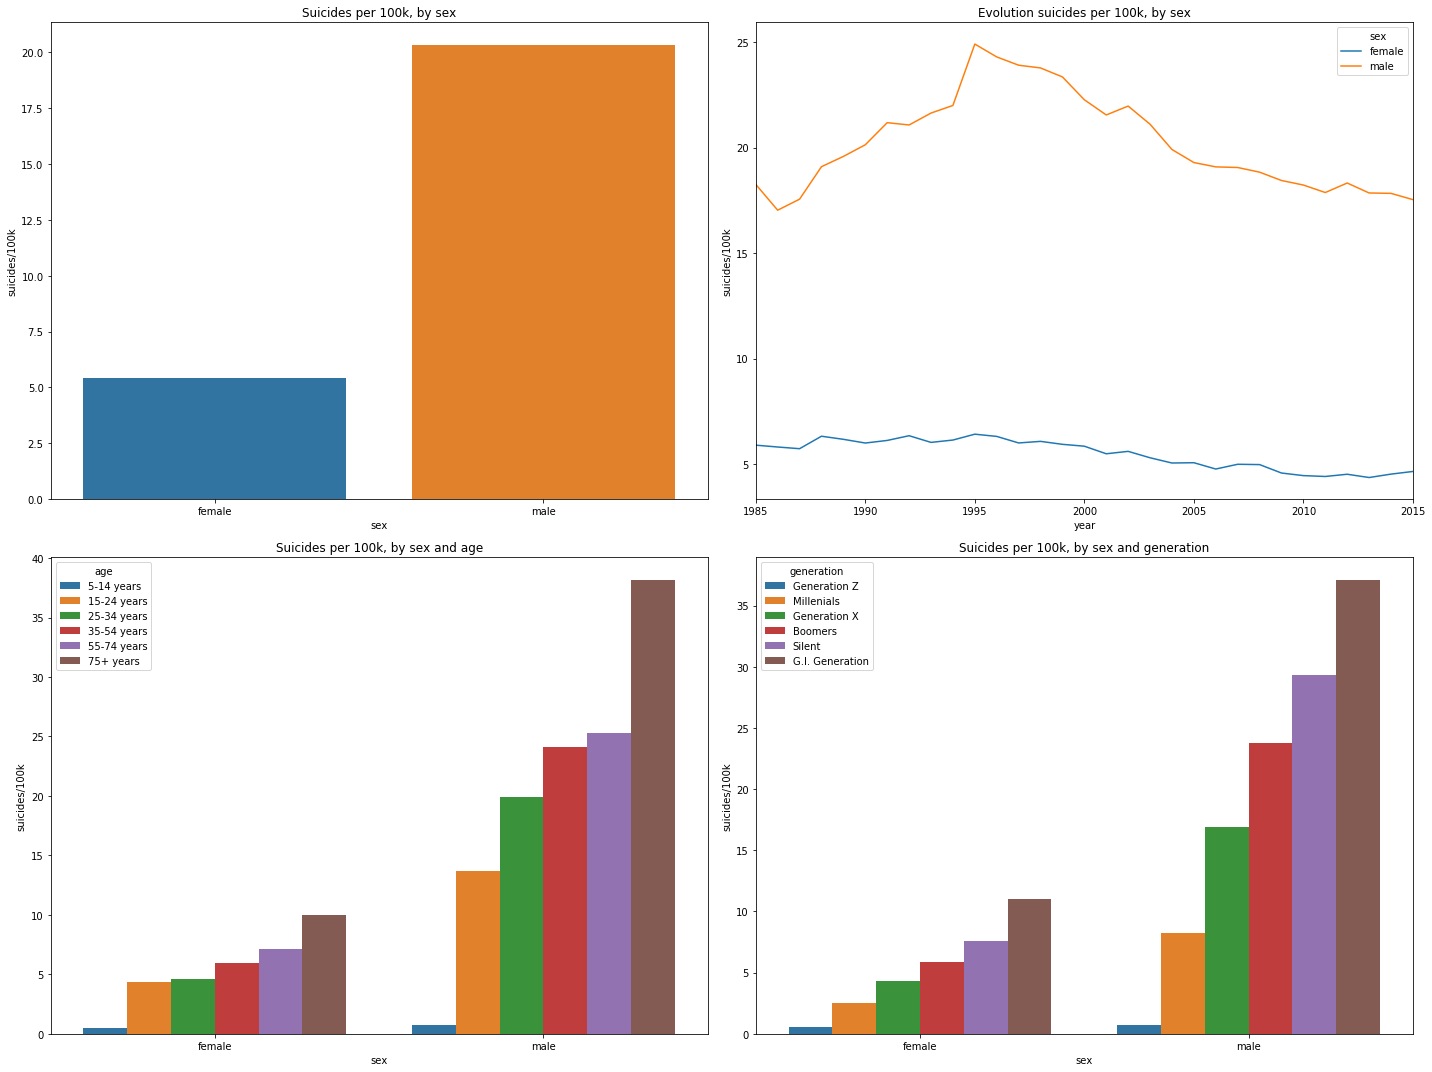

In [27]:
plt.figure(figsize=(20,15))
# By sex
plt.subplot(221)
sns.barplot(x='sex', y='suicides/100k', data=bySex, alpha=1)
plt.title('Suicides per 100k, by sex')
# Time evolution by sex
plt.subplot(222)
sns.lineplot(x='year', y='suicides/100k', data=bySexYear, hue='sex')
plt.xlim(1985,2015)
plt.title('Evolution suicides per 100k, by sex')
# By sex and age
plt.subplot(223)
sns.barplot(x='sex', y='suicides/100k', data=bySexAge, hue='age', alpha=1)
plt.title('Suicides per 100k, by sex and age')
# By sex and generation
plt.subplot(224)
sns.barplot(x='sex', y='suicides/100k', data=bySexGeneration, hue='generation', alpha=1)
plt.title('Suicides per 100k, by sex and generation')

plt.tight_layout()
plt.show()

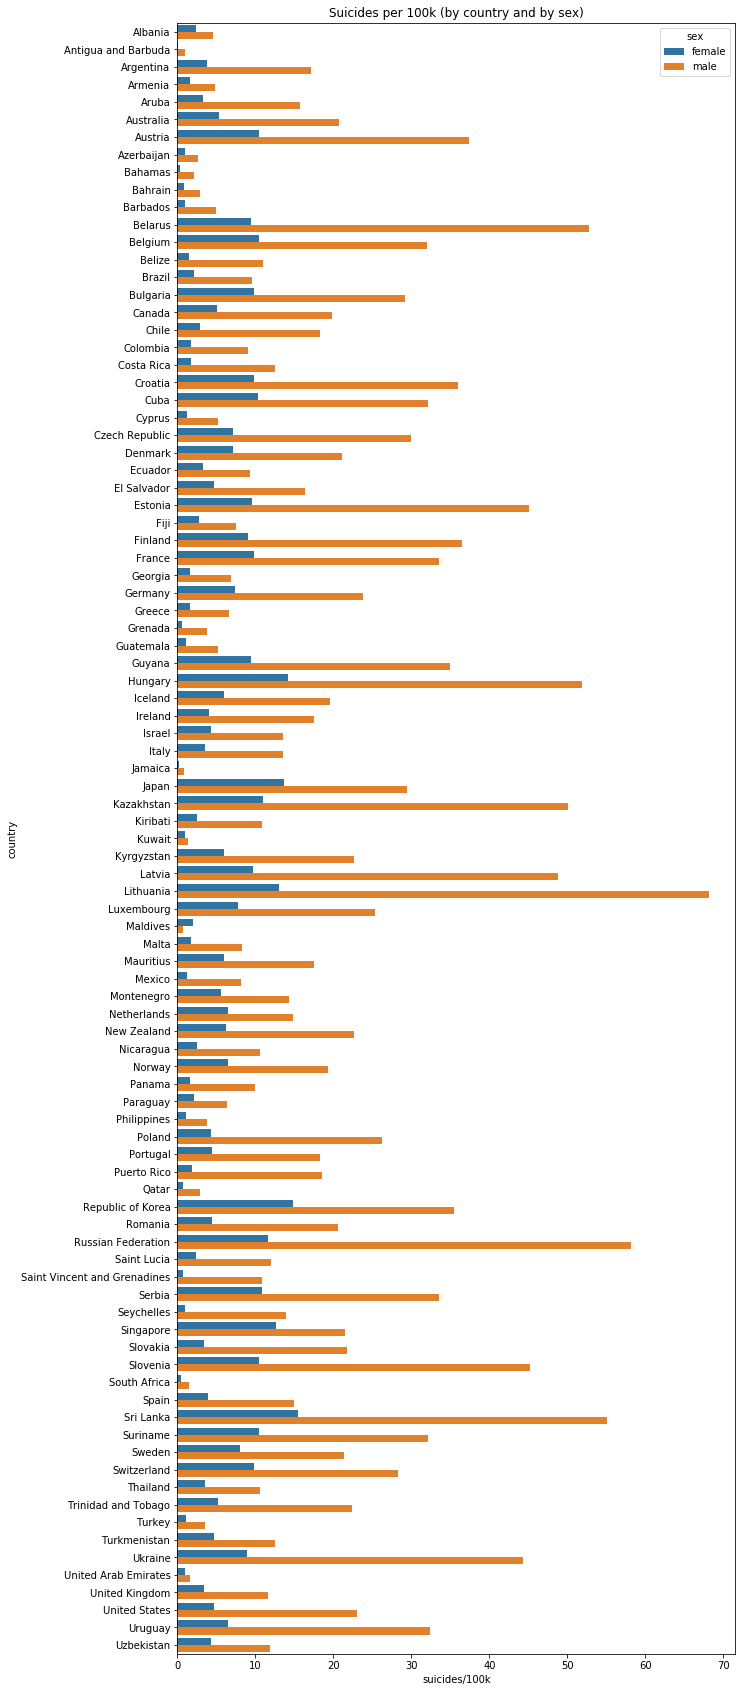

In [28]:
byCountrySex = df.groupby(['country','sex']).mean().reset_index()
byCountrySex.head()
plt.figure(figsize=(10,30))
sns.barplot(y='country', x='suicides/100k', data=byCountrySex, hue='sex')
plt.title('Suicides per 100k (by country and by sex)')
plt.show()

### Conclusion

Male tend to commit more suicides than female

### Countries with more female suicide rate than male

In [29]:
for country in byCountrySex['country']:
    suicides_female = byCountrySex[(byCountrySex['sex']=='female') & \
                                   (byCountrySex['country']==country)]['suicides/100k']
    suicides_male   = byCountrySex[(byCountrySex['sex']=='male')   \
                                   & (byCountrySex['country']==country)]['suicides/100k']
    if suicides_female.iloc[0] > suicides_male.iloc[0]:
        print(country)
        
        
        

Maldives
Maldives


### Suicides by Age

In [30]:
byAge = df.groupby('age').mean().reset_index()
byAgeYear = df.groupby(['age','year']).mean().reset_index()
byAgeSex = df.groupby(['age','sex']).mean().sort_values('suicides/100k',ascending = True).reset_index()
byAgeGeneration = df.groupby(['age','generation']).mean().sort_values('suicides/100k', ascending = True).reset_index()


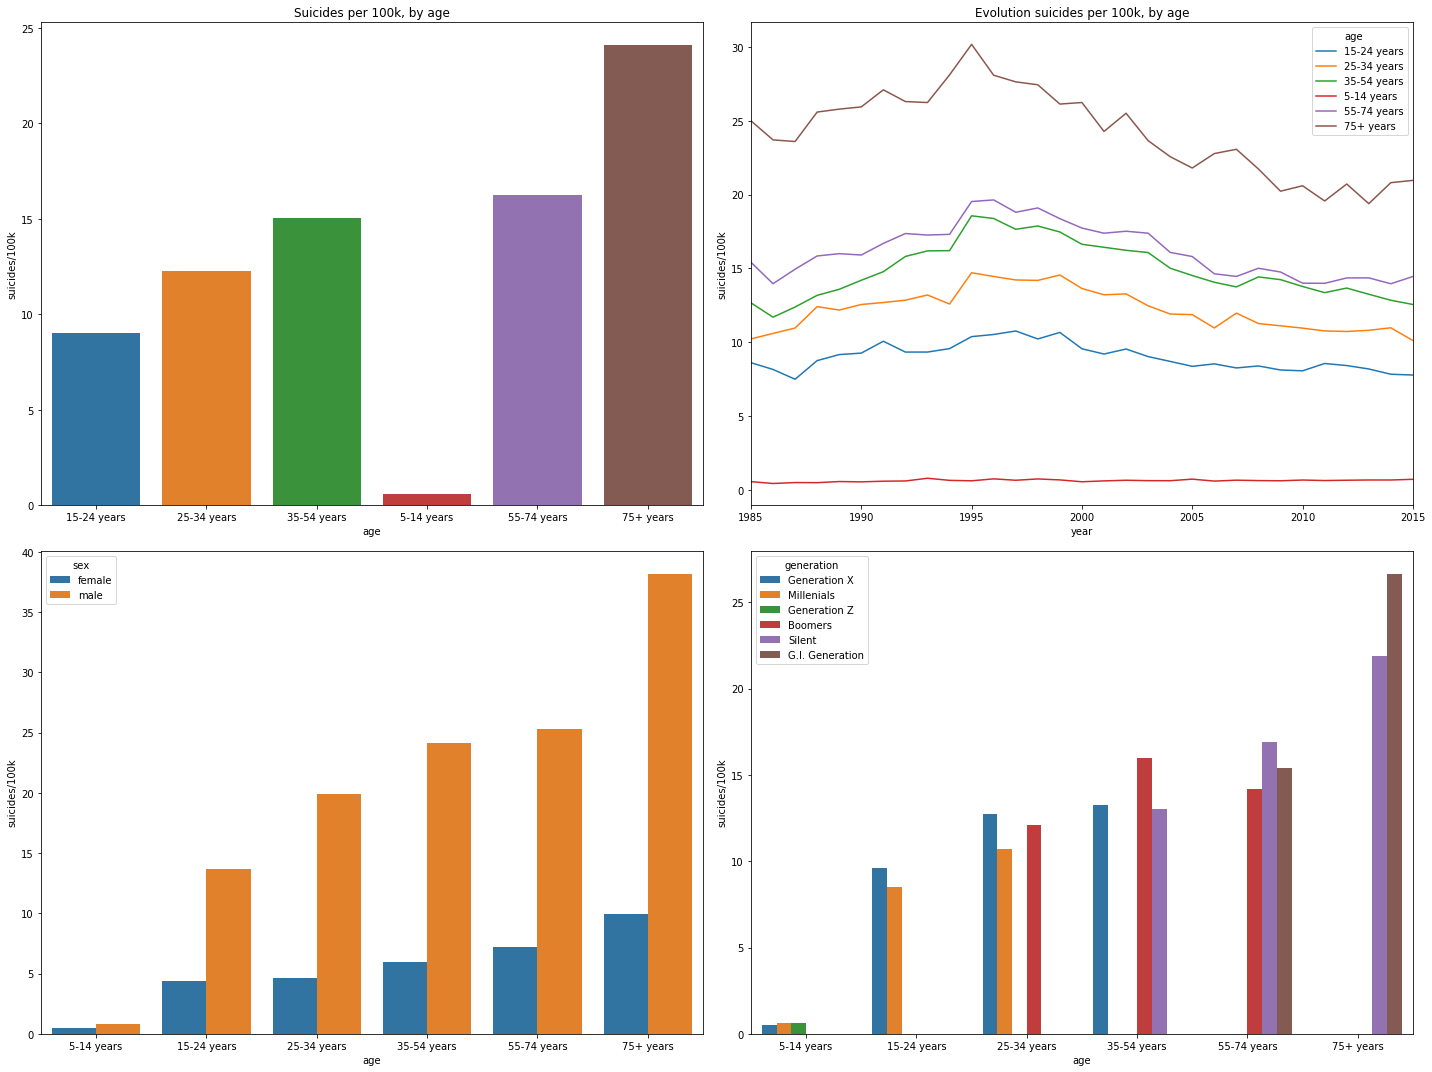

In [31]:
plt.figure(figsize=(20,15))
# By age
plt.subplot(221)
sns.barplot(x='age', y='suicides/100k', data=byAge, alpha=1)
plt.title('Suicides per 100k, by age')
# Time evolution by age
plt.subplot(222)
sns.lineplot(x='year', y='suicides/100k', data=byAgeYear, hue='age')
plt.xlim(1985,2015)
plt.title('Evolution suicides per 100k, by age')
# 
plt.subplot(223)
sns.barplot(x='age', y='suicides/100k', data=byAgeSex, hue='sex', alpha=1)
plt.subplot(224)
sns.barplot(x='age', y='suicides/100k', data=byAgeGeneration, hue='generation', alpha=1)

plt.tight_layout()
plt.show()

### Conclusions

1. The number of suicides per 100k increases with the age.
2. The number of suicides per 100k decreases from 1995 to 2015 in all age groups except 5-14 year, which slightly increases.
3. The peak of suicides in 1995 is more striking for people with ages +75.
4. In all age groups there are more male suicides per 100k than female ones.

### Suicides and GDP

In [32]:
byCountry.head()

,country,year,suicides,population,suicides/100k,gdp_per_capita ($),index
0,Lithuania,2005.000000,108.003968,2.604758e+05,40.583968,9024.142857,52.0
1,Sri Lanka,1997.545455,421.522727,1.382770e+06,35.295152,904.272727,87.0
2,Russian Federation,2002.000000,3733.771605,1.139137e+07,34.892377,6518.814815,75.0
3,Hungary,2003.000000,240.433333,8.008463e+05,33.049100,9234.120000,40.0
4,Belarus,2001.095238,237.666667,7.832234e+05,31.075913,3333.904762,11.0


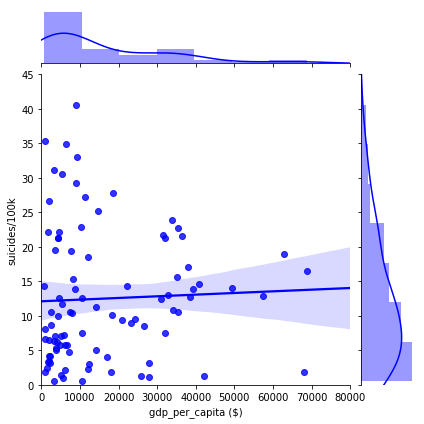

In [33]:
gdp = sns.jointplot(x="gdp_per_capita ($)", y="suicides/100k", data=byCountry, kind='regresion', \
              xlim=(-100,80000), ylim=(0,45), color='blue')

In [34]:
Maldives = df[df['country']=='Maldives']

In [35]:
Maldives_byYear = Maldives.groupby('year').mean().reset_index()
Maldives_bySexYear = Maldives.groupby(['sex','year']).mean().reset_index()
Maldives_byAgeYear = Maldives.groupby(['age','year']).mean().reset_index()


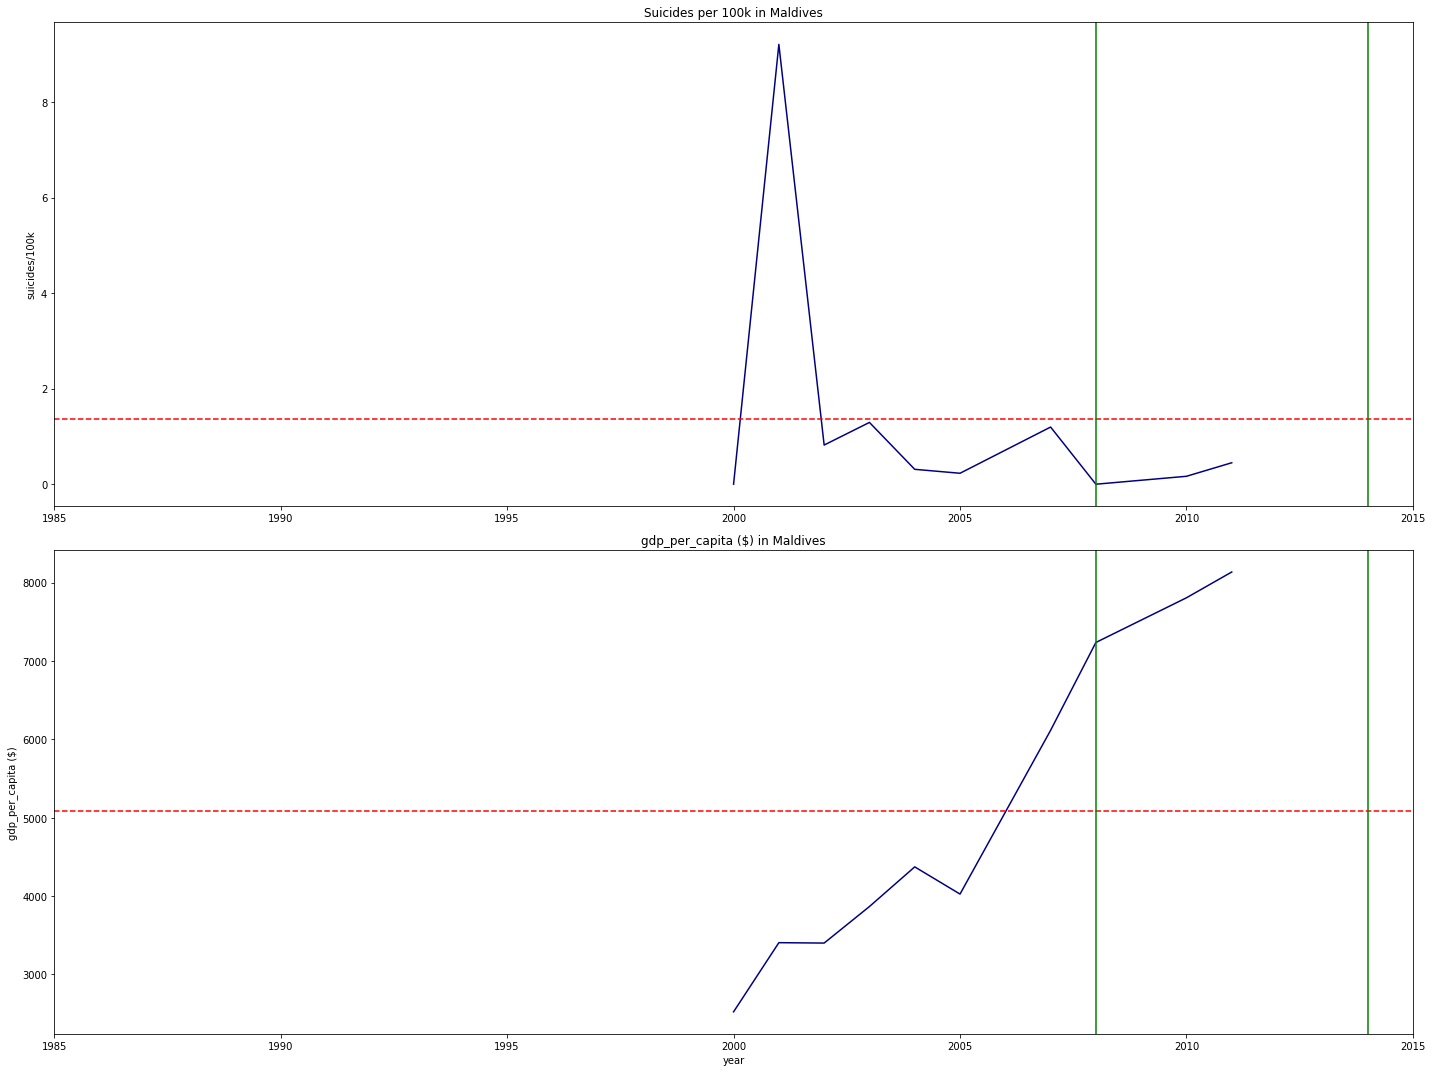

In [36]:
plt.figure(figsize = (20,15))
plt.subplot(211)
sns.lineplot(x = 'year', y = 'suicides/100k', data = Maldives_byYear, color = 'navy')
plt.axhline(Maldives_byYear['suicides/100k'].mean(), ls = '--', color = 'red')
plt.axvline(x = 2008, ls = '-', color = 'green')
plt.axvline(x = 2014, ls = '-', color = 'green')
plt.title('Suicides per 100k in Maldives')
plt.xlim(1985, 2015)
plt.xlabel('')

plt.subplot(212)
sns.lineplot(x = 'year', y = 'gdp_per_capita ($)', data = Maldives_byYear, color = 'navy')
plt.axhline(Maldives_byYear['gdp_per_capita ($)'].mean(), ls = '--', color = 'red')
plt.axvline(x = 2008, ls = '-', color = 'green')
plt.axvline(x = 2014, ls = '-', color = 'green')
plt.title('gdp_per_capita ($) in Maldives')
plt.xlim(1985, 2015)
plt.tight_layout()
plt.show()
